# Load the data

In [ ]:
import pandas as pd
messages=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

# Exploratory Data Analysis (EDA)

In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Group by label and get statistics

In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# Feature Engineering: Add message length as a new feature

In [ ]:
messages['length']=messages['message'].apply(len)

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visuvalization

In [ ]:
import matplotlib.pyplot as plt
import seaborn

<Axes: ylabel='Frequency'>

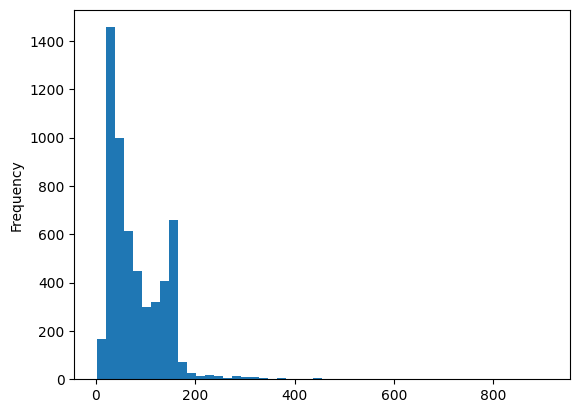

In [ ]:
messages['length'].plot(bins=50,kind='hist')  # Histogram of message lengths


<Axes: >

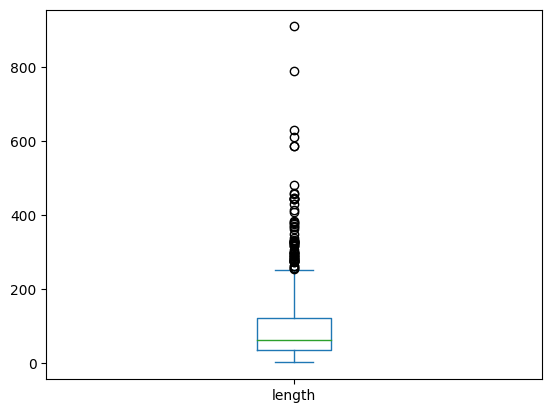

In [ ]:
messages['length'].plot(kind='box')  # Boxplot of lengths by spam/ham


In [ ]:
messages.length.describe()    # Summary statistics of message lengths


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

# Examine the longest message

In [ ]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Histograms of message lengths for spam and ham


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

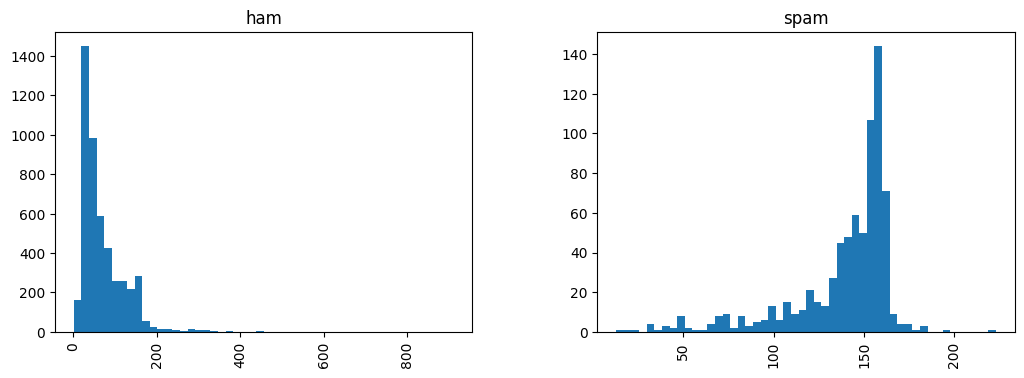

In [ ]:
messages.hist(column='length',by='label',bins=50,figsize=(12,4))

# Text Processing (Cleaning and Preprocessing)

In [ ]:
import nltk

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import string

# Test text processing on a sample

In [ ]:
mess="Hi!! i am chandra and i am implementing nltk #chandra"

# Remove punctuation

In [ ]:
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
nopunc

'Hi i am chandra and i am implementing nltk chandra'

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
nopunc.split()

['Hi',
 'i',
 'am',
 'chandra',
 'and',
 'i',
 'am',
 'implementing',
 'nltk',
 'chandra']

# Tokenization and removing stopwords

In [ ]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Hi', 'chandra', 'implementing', 'nltk', 'chandra']

# Text processing function (to be applied to messages)

In [ ]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Apply the text processing function on sample message

In [ ]:
text_process('i am chandra i am learning NLP #MachineLearning')

['chandra', 'learning', 'NLP', 'MachineLearning']

# Apply the text processing function to the first few messages

In [ ]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words (BoW) Model (Feature Extraction)

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [ ]:
len(bow_transformer.vocabulary_)

11425

# Example of transforming a message into BoW representation

In [ ]:
message911=messages['message'][911]
message911

"My love ! How come it took you so long to leave for Zaher's? I got your words on ym and was happy to see them but was sad you had left. I miss you"

In [ ]:
bow911=bow_transformer.transform([message911])


In [ ]:
print(bow_transformer.get_feature_names_out()[11154])

words


# Transform all messages into BoW vectors

In [ ]:
message_bow=bow_transformer.transform(messages['message'])

In [ ]:
message_bow.shape

(5572, 11425)

In [ ]:
message_bow.nnz

50548


# Term Frequency-Inverse Document Frequency (TF-IDF) Model

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer=TfidfTransformer().fit(message_bow)

# Example of transforming BoW into TF-IDF representation


In [ ]:
tfidf911=tfidf_transformer.transform(bow911)
print(tfidf911)

  (0, 11307)	0.36653432372995765
  (0, 11154)	0.28288984597546113
  (0, 10566)	0.2871919092680169
  (0, 9613)	0.206214007808563
  (0, 9507)	0.29457885105440146
  (0, 8191)	0.23635403290697946
  (0, 7913)	0.20519455864025524
  (0, 7876)	0.2573971451299682
  (0, 7748)	0.26755825965923113
  (0, 7742)	0.24474933245186525
  (0, 7035)	0.2473552671777627
  (0, 6906)	0.18622647822668245
  (0, 5601)	0.18666067139790843
  (0, 4455)	0.3839631434685476


# Transform all BoW vectors into TF-IDF vectors

In [ ]:
message_tfidf=tfidf_transformer.transform(message_bow)

In [ ]:
message_tfidf.shape

(5572, 11425)

# Naive Bayes Classifier for Spam Detection

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detector=MultinomialNB().fit(message_tfidf,messages['label'])

# Prediction on the sample message (911)

In [ ]:
print("pridected",spam_detector.predict(tfidf911))

pridected ['ham']


In [ ]:
print("expected",messages.label[911])

expected ham


# Prediction on the entire dataset

In [ ]:
all_predictions=spam_detector.predict(message_tfidf)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Model Evaluation

In [ ]:
print(classification_report(messages['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



# Train-Test Split for Model Evaluation (Using Pipelines)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.2)

In [ ]:
len(msg_test)

1115

In [ ]:
len(msg_train)

4457

In [ ]:
from sklearn.pipeline import Pipeline

# Pipeline for text processing, feature extraction, and classification

In [ ]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

# Train the pipeline on the training data

In [ ]:
pipeline.fit(X=msg_train,y=label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79dc4772b2e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

# Make predictions on the test data

In [ ]:
predictions=pipeline.predict(msg_test)


# Evaluate the pipeline

In [ ]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1010
        spam       0.73      1.00      0.85       105

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
print(confusion_matrix(predictions,label_test))

[[972  38]
 [  0 105]]
